<h1>Dimensionality Reduction</h1>

<img src="img/inversion.png" width="400" height="400"></img>

<h2>What's the problem?</h2>
<p>The problem is the <b>Curse of dimensionality</b>:
<i>The curse of dimensionality refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces (often with hundreds or thousands of dimensions) that do not occur in low-dimensional settings such as the three-dimensional physical space of everyday experience.</i></p>

<p>Indeed, as you have seen till now, a lot of machine learning problems involve thousands or millions of features and this make training very slow and also the result not too accurate.</p>

<h2>What we do then?</h2>
<p>We reduce these dimensions! It's like when you compress your files to save space. Of course with this operation we lose some information, but in theory those information are "useless" for our goal.</p>

<h2>Techniques:</h2>
<ul>
    <li>PCA (projection)</li>
    <li>Kernel PCA</li>
    <li>LLE (different approach --> manifold learning)</li>
    <li>MDS</li>
    <li>t-SNE (very good when you want to <b>visualize</b> your data)</li>
    <li>...</li>
</ul>

<h1>Example with MNIST dataset</h1>

In [1]:
from sklearn.datasets import fetch_mldata
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

In [3]:
# MNIST dataset is already split into a training set (the first 60000 images) and a test set (the last 10000)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

<p>Let's train a Random Forest Classifier on the dataset and see how long it takes</p>

In [5]:
%%time
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba")

Wall time: 11.6 s


In [7]:
# Print the model's accuracy
from sklearn.metrics import accuracy_score
forest_clf.fit(X_train, y_train)
y_pred = forest_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9455


<p>Now let's use PCA to reduce the dataset's dimensionality and then repeate the previous steps to see the difference</p>

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X__train_reduced = pca.fit_transform(X_train)

In [9]:
%%time
forest_clf_2 = RandomForestClassifier(random_state=42)
y_probas_forest_2 = cross_val_predict(forest_clf_2, X_train_reduced, y_train, cv=3, method="predict_proba")

Wall time: 37.9 s


In [11]:
X_test_reduced = pca.transform(X_test)
y_pred_2 = forest_clf_2.predict(X_test_reduced)
print(accuracy_score(y_test, y_pred_2))

0.8908


<p>Ok, what happened?! Well, reduce the dimensionality does not always work, sometimes it makes the situation worse and this is the case. We could try other methods to train the dataset, like a Softmax classifier, and see if we have the same circumstance</p>

<h1>t-SNE</h1>
<p>Now let's use another technique, <b>t-SNE</b>, to reduce the dataset and then to visualize it!</p>

In [12]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

In [13]:
# Using all 60000 images would take too long to train, so let's select 10000 images randomly
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

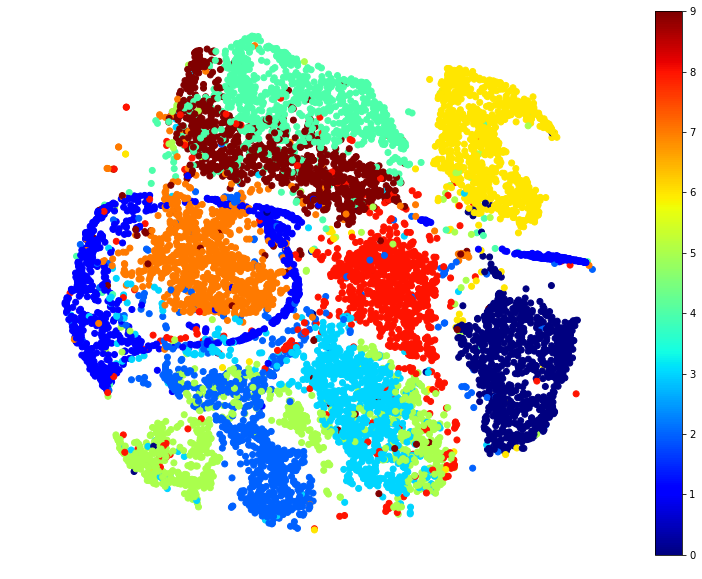

In [15]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()